In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PenultimateFRP import CopolymerizationModel
%load_ext autoreload
%autoreload 2

In [3]:
# Initiation rate constant
kd    = 3e-06 
f     = 0.5

# Propagation rate constants
kpAA = 2.0e+04
kpAB = 5.0e+04
kpBA = 4.0e+02
kpBB = 8.0e+02

# Depropagation rate constants
kdAA = 0
kdAB = 0
kdBA = 0
kdBB = 0
kdf = 0.5
# kdAA = kdf*kpAA
# kdAB = kdf*kpAB
# kdBA = kdf*kpBA
kdBB = kdf*kpBB

# Termination by combination rate constants
ktcAA = 2*1.5e+08
ktcAB = 2*5.0e+07
ktcBB = 2*1.5e+07
ktcAA = 0
ktcAB = 0
ktdBB = 0

# Termination by disproportionation rate constants
ktdAA = 2*9.0e+06     
ktdAB = 2*1.5e+07
ktdBB = 2*2.0e+07

k = [kd, f, 
     kpAA, kpAB, kpBA, kpBB, 
     kdAA, kdAB, kdBA, kdBB,
     ktcAA, ktcAB, ktcBB,
     ktdAA, ktdAB, ktdBB]

# Define initial concentrations
I0 = 0.005
A0 = 0.9
B0 = 2.1
CA_final = A0 / (A0 + B0)
CB_final = B0 / (A0 + B0)

y0 = np.zeros(33)
y0[0] = I0
y0[2] = A0
y0[3] = B0

t_span = [0, 60*3600]

In [4]:
cm = CopolymerizationModel(k, y0, t_span)

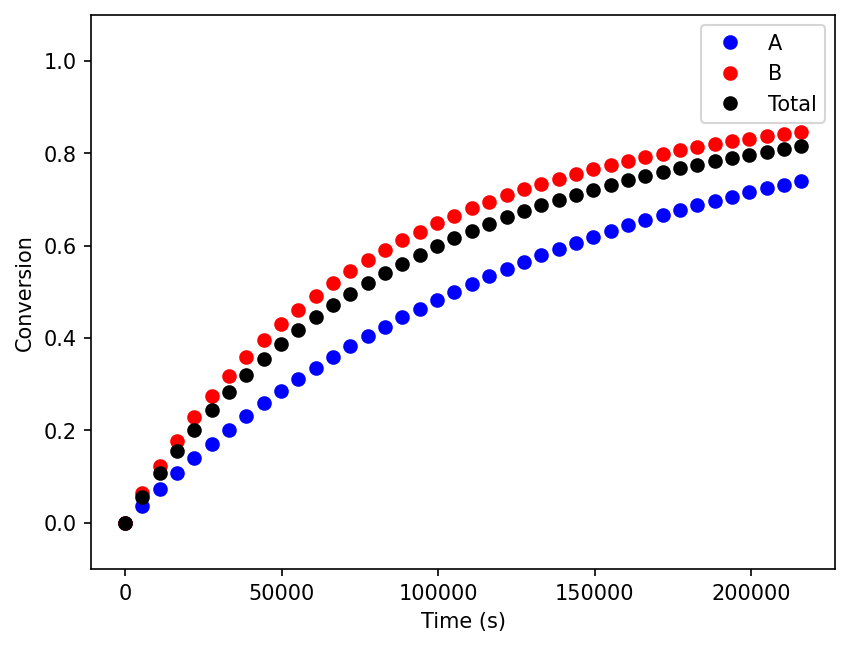

In [5]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.xA, 'bo', label='A')
plt.plot(cm.t, cm.xB, 'ro', label='B')
plt.plot(cm.t, cm.x,  'ok', label='Total')
plt.ylim([-0.1, 1.1])
plt.xlabel("Time (s)")
plt.ylabel("Conversion")
plt.legend()

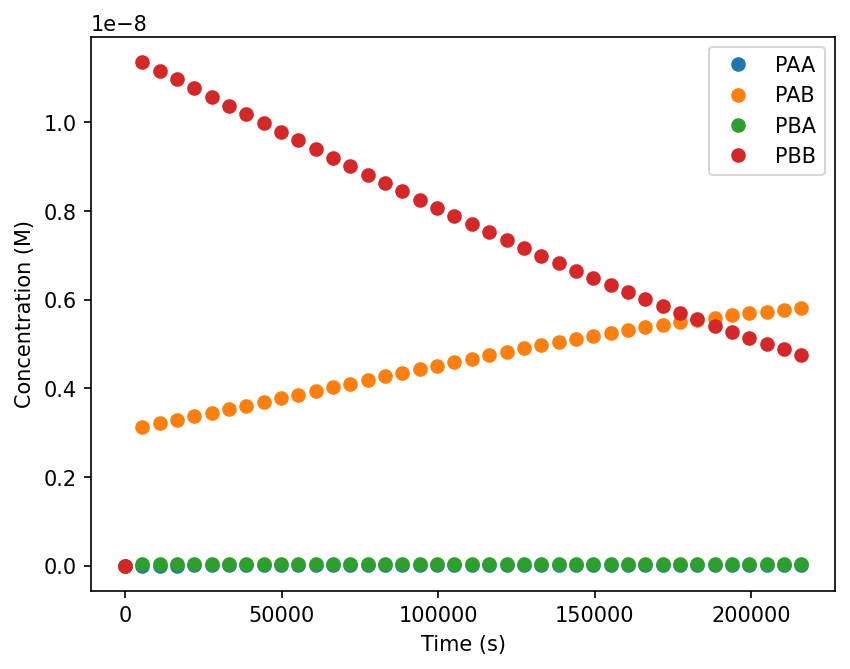

In [7]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.sol[6], 'o', label='PAA', color='tab:blue')
plt.plot(cm.t, cm.sol[7], 'o', label='PAB', color='tab:orange')
plt.plot(cm.t, cm.sol[8], 'o', label='PBA', color='tab:green')
plt.plot(cm.t, cm.sol[9], 'o', label='PBB', color='tab:red')

plt.xlabel("Time (s)")
plt.ylabel("Concentration (M)")
plt.legend()


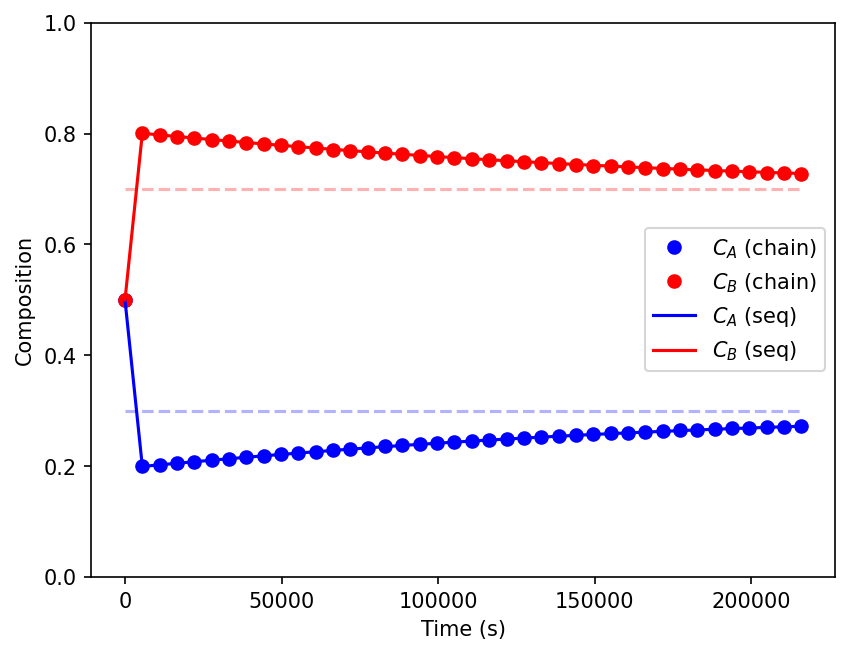

In [8]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.CA, 'bo', label='$C_A$ (chain)')
plt.plot(cm.t, cm.CB, 'ro', label='$C_B$ (chain)')

plt.plot(cm.t, cm.SA_1/(cm.SA_1+cm.SB_1), 'b-', label='$C_A$ (seq)')
plt.plot(cm.t, cm.SB_1/(cm.SA_1+cm.SB_1), 'r-', label='$C_B$ (seq)')

plt.plot(t_span, CA_final*np.ones_like(t_span), 'b--', alpha=0.3)
plt.plot(t_span, CB_final*np.ones_like(t_span), 'r--', alpha=0.3)

plt.ylim([0, 1])
plt.ylabel('Composition')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

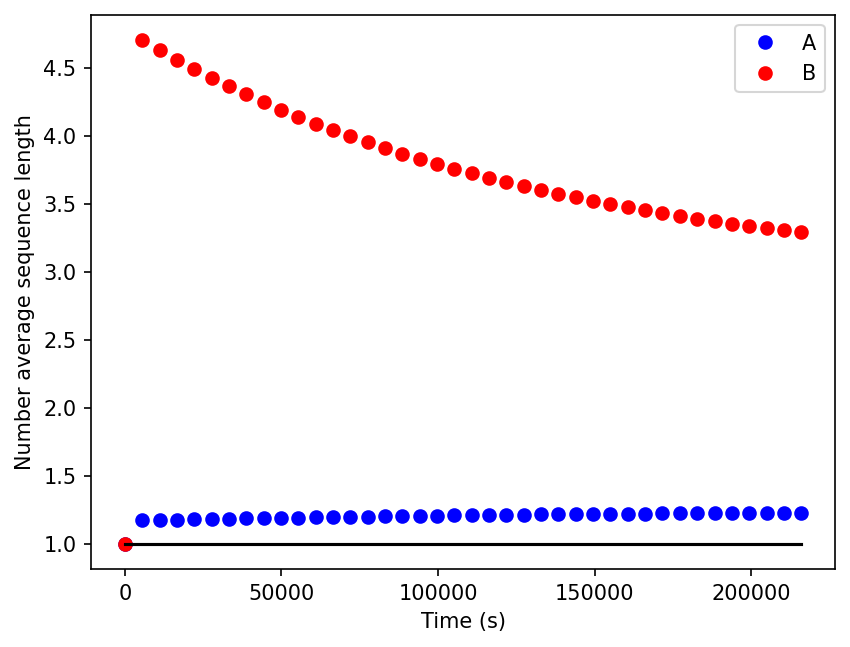

In [9]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.NASL_A, 'o', color='b',   label='A')
plt.plot(cm.t, cm.NASL_B, 'o', color='r', label='B')
plt.plot(cm.t, np.ones_like(cm.t), 'k-')
plt.xlabel("Time (s)")
plt.ylabel("Number average sequence length")
plt.legend()

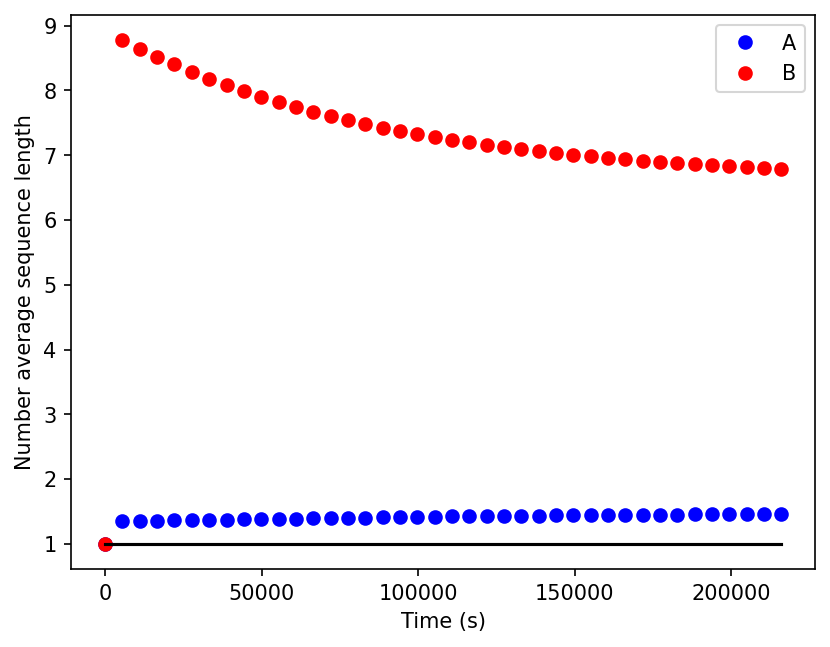

In [10]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.WASL_A, 'o', color='b',   label='A')
plt.plot(cm.t, cm.WASL_B, 'o', color='r', label='B')
plt.plot(cm.t, np.ones_like(cm.t), 'k-')
plt.xlabel("Time (s)")
plt.ylabel("Number average sequence length")
plt.legend()

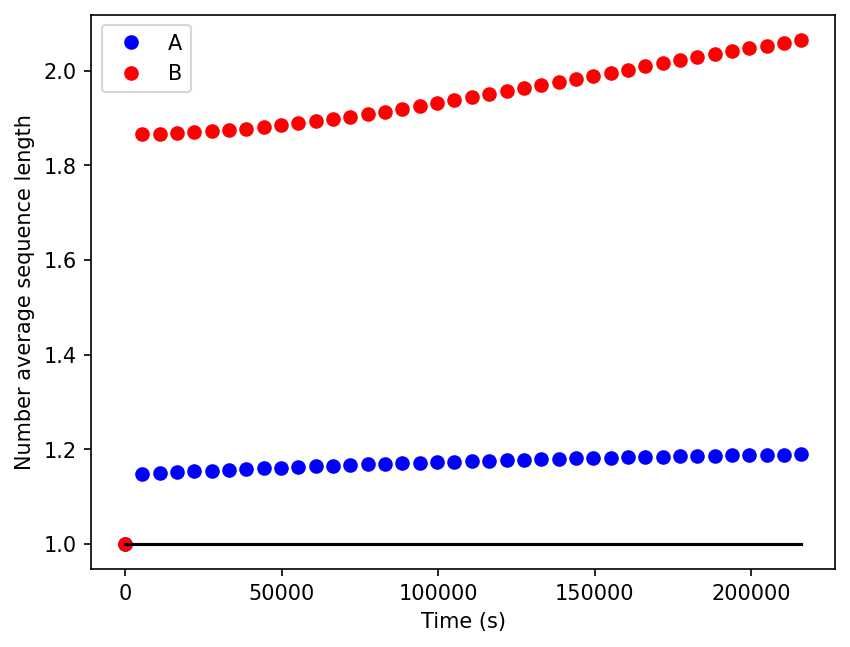

In [12]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.SA_2*cm.SA_0/cm.SA_1**2, 'o', color='b',   label='A')
plt.plot(cm.t, cm.SB_2*cm.SB_0/cm.SB_1**2, 'o', color='r', label='B')
# plt.plot(df['KMC Time'], df_mwd['SL_A'], '-', color='b')
# plt.plot(df['KMC Time'], df_mwd['SL_B'], '-', color='r')
plt.plot(cm.t, np.ones_like(cm.t), 'k-')
# plt.ylim([0.75, 4])
plt.xlabel("Time (s)")
plt.ylabel("Number average sequence length")
plt.legend()

Text(0, 0.5, 'Number average chain length (DOP)')

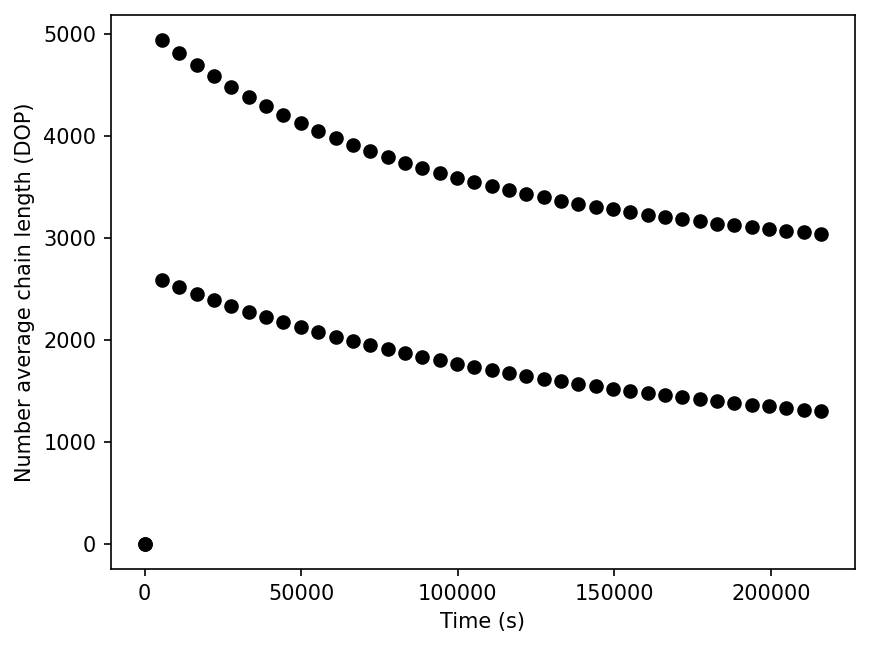

In [12]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.PD_1/cm.PD_0, 'ko')
plt.plot(cm.t, cm.PD_2/cm.PD_1, 'ko')
plt.xlabel("Time (s)")
plt.ylabel("Number average chain length (DOP)")

Text(0, 0.5, 'Number average chain length (DOP)')

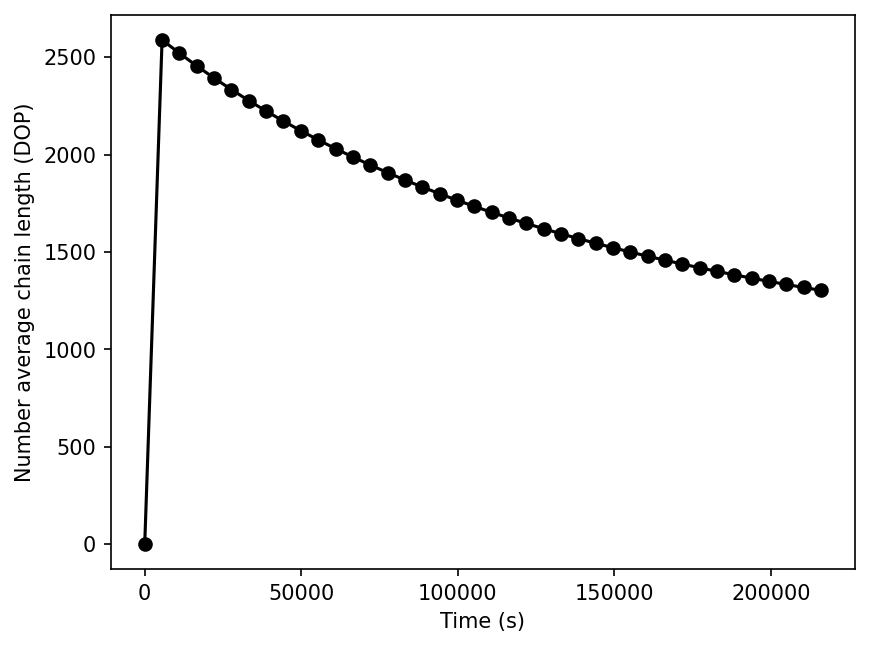

In [13]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.PD_1/cm.PD_0, 'ko-')
plt.xlabel("Time (s)")
plt.ylabel("Number average chain length (DOP)")

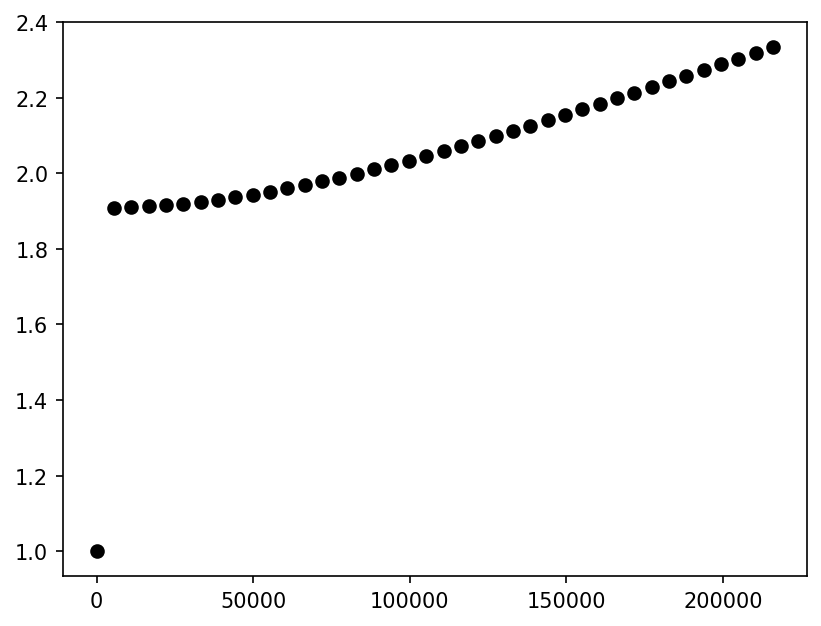

In [15]:
plt.figure(dpi=150)
plt.plot(cm.t, cm.PDI, 'ko')